In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [2]:
from weight_boosting import AdaBoostClassifierEXP3
import weight_boosting
weight_boosting

<module 'weight_boosting' from 'C:\\Users\\alexi\\Documents\\cours\\ia\\communication\\weight_boosting.py'>

In [3]:
wine = load_wine()
wine = load_digits()

In [4]:
X = wine['data'][:,:]
y = wine['target']

#X[:,1] = np.random.random(len(X))
#X[:,1] = np.random.random(len(X))
#X[:,2] = np.random.random(len(X))

#enc = OneHotEncoder()
#y = enc.fit_transform(y).toarray()

X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [6]:
adaBoost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME',
    n_estimators=10,
    learning_rate=0.5,
    random_state=27)

adaBoost.fit(X_train, y_train)
adaBoost.score(X_test, y_test)

0.4027777777777778

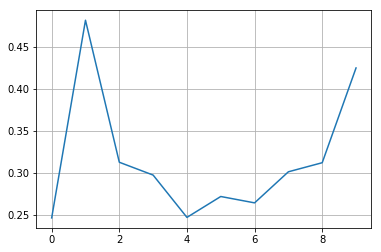

0.2833333333333333

In [7]:
adaBoostEXP3 = AdaBoostClassifierEXP3(
    DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME',
    n_estimators=10,
    learning_rate=0.1,
    mu=0.3,
    lamb=0.15,
    random_state=27)

adaBoostEXP3.fit(X_train, y_train)

plt.plot(adaBoostEXP3.rewards)
plt.grid(which='both')
plt.show()

adaBoostEXP3.score(X_test, y_test)


In [8]:
import time

learning_rate = 0.5
range_n = list(range(5,50,5))
score_org = []
time_org = []
score_xp3 = []
time_xp3 = []


for n in range_n:
    adaBoost = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME',
        n_estimators=n,
        learning_rate=learning_rate)

    t = time.time()
    adaBoost.fit(X_train, y_train)
    time_org.append(time.time()-t)
    
    score_org.append(adaBoost.score(X_test, y_test))
    

for n in range_n:
    adaBoostEXP3 = AdaBoostClassifierEXP3(
        DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME',
        mu=None,
        lamb=None,
        n_estimators=n,
        learning_rate=learning_rate)

    t = time.time()
    adaBoostEXP3.fit(X_train, y_train)
    time_xp3.append(time.time()-t)
    
    score_xp3.append(adaBoostEXP3.score(X_test, y_test))

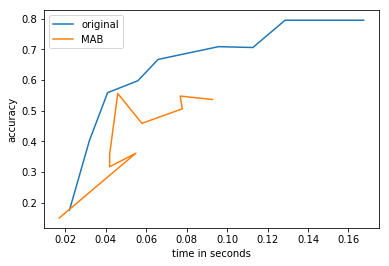

In [9]:
import matplotlib.pyplot as plt

plt.plot(time_org, score_org, label='original')
plt.plot(time_xp3, score_xp3, label='MAB')
#plt.plot(range_n, score_org, label='original')
#plt.plot(range_n, score_xp3, label='MAB')
plt.xlabel('time in seconds')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import make_scorer, hamming_loss, accuracy_score
hamming_scorer = make_scorer(hamming_loss)
accuracy_scorer = make_scorer(accuracy_score)

In [28]:
from sklearn.model_selection import GridSearchCV

range_n = list(range(5,300,5))

parameters = {
    'n_estimators': tuple(range_n),
    'learning_rate': (0.5,)
}

adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm='SAMME')
clf = GridSearchCV(adaBoost, parameters, cv=2, scoring={'hamming': hamming_scorer, 'accuracy': accuracy_scorer}, refit='hamming', n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295), 'learning_rate': (0.5,)},
       pre_dispatch='2*n_jobs', refit='hamming', return_train_score='warn',
       

In [41]:
parameters2 = {
    'n_estimators': tuple(range_n),
    'learning_rate': (0.5,),
    'lamb': (0.05,),
    'mu': (0.1,)
}

adaBoostEXP3 = AdaBoostClassifierEXP3(DecisionTreeClassifier(max_depth=1), algorithm='SAMME')
clf2 = GridSearchCV(adaBoostEXP3, parameters2, cv=2, scoring={'hamming': hamming_scorer, 'accuracy': accuracy_scorer}, refit='hamming', n_jobs=-1)
clf2.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostClassifierEXP3(algorithm='SAMME',
            base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, ...,
            lamb=None, learning_rate=1.0, mu=None, n_estimators=50,
            random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295), 'learning_rate': (0.5,), 'lamb': (0.05,), 'mu': (0.1,)},
       pre_dispatch='2*n_jobs', refit='hamming', return_train_score='warn',
       scoring={'hamming': make_scorer(hamming_loss), 'acc

In [42]:
res = pd.DataFrame(clf.cv_results_)
res['estimator'] = 'adaboost'
res2 = pd.DataFrame(clf2.cv_results_)
res2['estimator'] = 'adaboost.exp3'
res = res.append(res2, ignore_index=True)
res.set_index('mean_fit_time', inplace=True)
res

c:\users\alexi\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_hamming'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\alexi\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_hamming'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\alexi\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_hamming'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\alexi\anaconda3\en

,estimator,mean_score_time,mean_test_accuracy,mean_test_hamming,mean_train_accuracy,mean_train_hamming,param_lamb,param_learning_rate,param_mu,param_n_estimators,...,split1_test_accuracy,split1_test_hamming,split1_train_accuracy,split1_train_hamming,std_fit_time,std_score_time,std_test_accuracy,std_test_hamming,std_train_accuracy,std_train_hamming
mean_fit_time,,,,,,,,,,,,,,,,,,,,,
0.012949,adaboost,0.002998,0.234279,0.765721,0.228055,0.771945,NaN,0.5,NaN,5,...,0.277902,0.722098,0.265261,0.734739,1.704693e-05,6.556511e-06,0.043501,0.043501,0.037206,0.037206
0.025422,adaboost,0.003975,0.263216,0.736784,0.321979,0.678021,NaN,0.5,NaN,10,...,0.361607,0.638393,0.402886,0.597114,4.874468e-04,1.382828e-05,0.098117,0.098117,0.080907,0.080907
0.038891,adaboost,0.004497,0.353367,0.646633,0.384947,0.615053,NaN,0.5,NaN,15,...,0.431920,0.568080,0.435072,0.564928,4.992366e-03,4.756451e-04,0.078335,0.078335,0.050125,0.050125
0.058327,adaboost,0.007979,0.387312,0.612688,0.446551,0.553449,NaN,0.5,NaN,20,...,0.497768,0.502232,0.556049,0.443951,5.476594e-03,1.995683e-03,0.110149,0.110149,0.109498,0.109498
0.082779,adaboost,0.010970,0.404563,0.595437,0.471130,0.528870,NaN,0.5,NaN,25,...,0.501116,0.498884,0.547170,0.452830,7.152557e-07,1.192093e-07,0.096285,0.096285,0.076040,0.076040
0.100730,adaboost,0.013464,0.401781,0.598219,0.471688,0.528312,NaN,0.5,NaN,30,...,0.496652,0.503348,0.547170,0.452830,9.971857e-04,4.986525e-04,0.094607,0.094607,0.075482,0.075482
0.118682,adaboost,0.015957,0.406233,0.593767,0.493401,0.506599,NaN,0.5,NaN,35,...,0.492188,0.507812,0.564928,0.435072,2.991915e-03,1.192093e-07,0.085716,0.085716,0.071526,0.071526
0.138129,adaboost,0.017952,0.527546,0.472454,0.583171,0.416829,NaN,0.5,NaN,40,...,0.565848,0.434152,0.591565,0.408435,1.495838e-03,0.000000e+00,0.038196,0.038196,0.008394,0.008394
0.155582,adaboost,0.019947,0.538676,0.461324,0.606974,0.393026,NaN,0.5,NaN,45,...,0.610491,0.389509,0.660377,0.339623,2.992153e-03,2.384186e-07,0.071616,0.071616,0.053403,0.053403


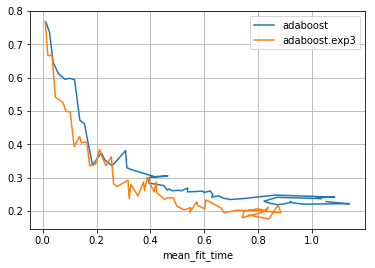

In [43]:
groups = res.groupby('estimator')['mean_test_hamming']
ax = groups.plot(x='mean_fit_time', y='mean_score', grid=True, legend=True)

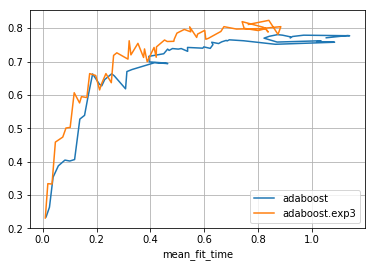

In [44]:
groups = res.groupby('estimator')['mean_test_accuracy']
ax = groups.plot(x='mean_fit_time', y='mean_score', grid=True, legend=True)